# <div align = center>MNIST: تصنيف الأرقام المكتوبة بخط اليد

<hr>

#1 - المكتبات (Librairies)

In [1]:
import tensorflow as tf              # مكتبة التعلم الآلي والذكاء الاصطناعي
import numpy as np                   # مكتبة الرياضيات المتقدمة
import matplotlib.pyplot as plt      # مكتبة الرسوم البيانية
import random                        # لتوليد أرقام عشوائية
from keras.datasets import mnist     # Keras من المكتبة Mnist مجموعة البيانات    
from keras.models import Sequential  # نوع النموذج الذي سيتم استخدامه
from keras.layers.core import Dense, Activation # أنواع الطبقات التي سيتم استخدامها في نموذجنا
from keras.utils import np_utils     # تحويل المخرجات من [1،0،....،9] إلى مصفوفة ثنائية 
from keras.utils.vis_utils import plot_model    # رسم صورة للنموذج

# 2 - البيانات  (Data)

## 2.1 - تحميل البيانات

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


## 2.2 - عرض البيانات

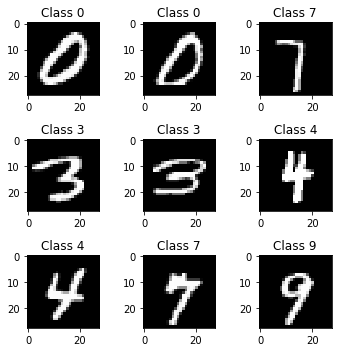

In [4]:
plt.rcParams['figure.figsize'] = (5,5) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

## 2.3 -  تغيير شكل المدخلات

In [5]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

In [6]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## 2.4 -  تغيير شكل المخرجات

In [25]:
print("y_train[0] = ", y_train[0])

y_train[0] =  5


In [9]:
nb_classes = 10 

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [26]:
print("Y_train[0] = ", Y_train[0])

Y_train[0] =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 3- الشبكة العصبية

## 3.1 - النموذج

In [11]:

model = Sequential([
  Dense(units=  128, activation='relu'   , name='Hidden_Layer_1',input_dim=784),
  Dense(units=  64 , activation='relu'   , name='Hidden_Layer_2'),  
  Dense(units=  10 , activation='softmax', name='Prediction')    

])

## 3.2 - ملخص النموذج 

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                8256      
                                                                 
 Prediction (Dense)          (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


## 3.3 - الرسم البياني للنموذج 

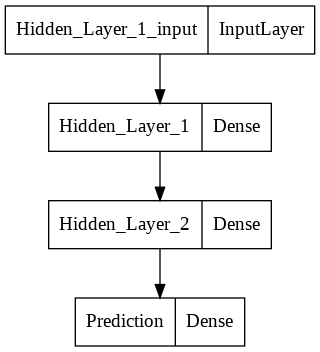

In [13]:
plot_model(model, to_file='Mnist_dense.png')

## 3.4 -  تركيب النموذج 

In [14]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

## 3.5 - تدريب النموذج



In [15]:
history = model.fit(X_train, Y_train,
                    epochs=7,
                    batch_size=100,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/7
420/420 [==============================] - 3s 5ms/step - loss: 3.0716 - accuracy: 0.8357 - val_loss: 0.8335 - val_accuracy: 0.8998
Epoch 2/7
420/420 [==============================] - 2s 4ms/step - loss: 0.5705 - accuracy: 0.9225 - val_loss: 0.6502 - val_accuracy: 0.9111
Epoch 3/7
420/420 [==============================] - 2s 4ms/step - loss: 0.3401 - accuracy: 0.9403 - val_loss: 0.4235 - val_accuracy: 0.9320
Epoch 4/7
420/420 [==============================] - 2s 4ms/step - loss: 0.2404 - accuracy: 0.9526 - val_loss: 0.3838 - val_accuracy: 0.9397
Epoch 5/7
420/420 [==============================] - 2s 4ms/step - loss: 0.1901 - accuracy: 0.9578 - val_loss: 0.3718 - val_accuracy: 0.9443
Epoch 6/7
420/420 [==============================] - 2s 5ms/step - loss: 0.1632 - accuracy: 0.9639 - val_loss: 0.3787 - val_accuracy: 0.9402
Epoch 7/7
420/420 [==============================] - 2s 4ms/step - loss: 0.1576 - accuracy: 0.9646 - val_loss: 0.3850 - val_accuracy: 0.9383


## 3.6 -  التقييم


In [16]:
loss, acc = model.evaluate(X_test, Y_test,verbose=1)

print("Accuracy = %0.2f" % (acc*100), "%")

313/313 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.9369
Accuracy = 93.69 %


# 4 - تحليل عملية التدريب

## 4.1 - الرسم البياني للدقة



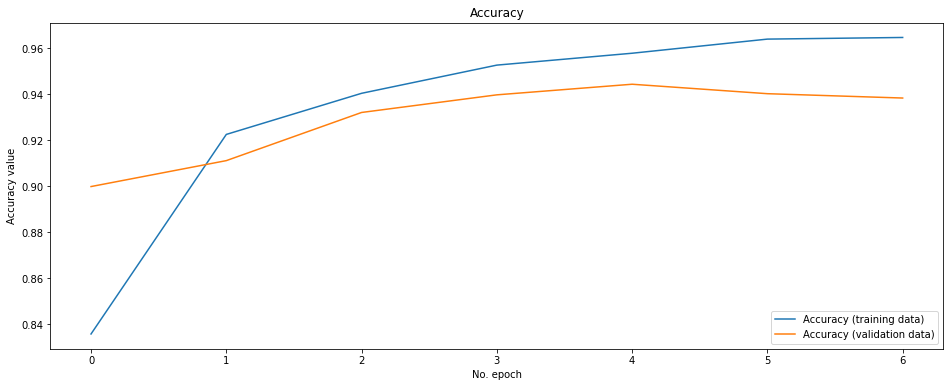

In [17]:
plt.figure(figsize=(16,6))
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## 4.2 - الرسم البياني للخطأ

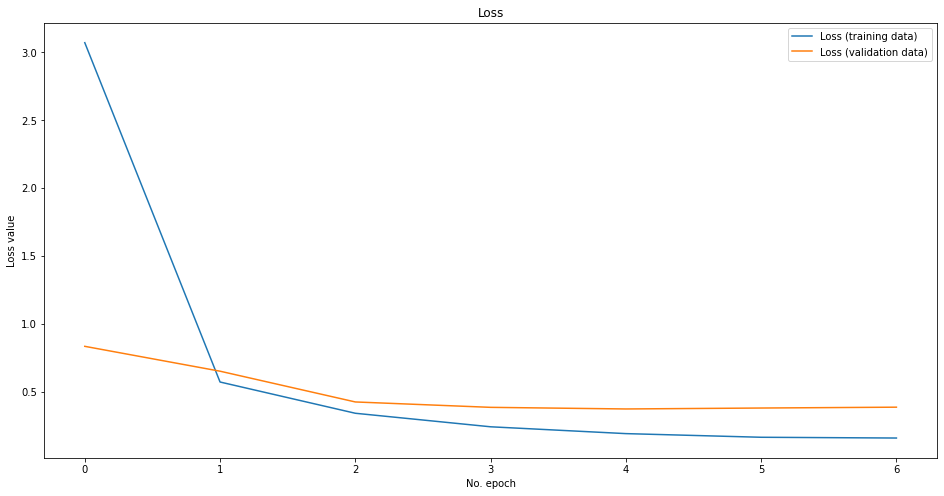

In [18]:
# Plot history: Loss
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()